# Лабораторная работа 6
## Дифференциальные уравнения (Wolfram)

Взять задание Sage лаба 3 (ДУ и хищник-жертва) и переделать на wolfram.  
Добавить слайдеры для изменения параметров модели (a, b, c, d и т.д.)

## Модель "хищник-жертва"

Имеются два биологических вида численностью в момент времени $t$ соответственно $x(t)$ и $y(t)$. Особи первого вида являются пищей для особей второго вида (хищников). Численности популяций в начальный момент времени известны. Требуется определить численность видов в произвольный момент времени. 

Математической моделью задачи является система дифференциальных уравнений Лотки – Вольтерра:
\begin{cases}
    \large{\frac{dx}{dt} = (a-by)x} \\
    \large{\frac{dy}{dt} = (-c+dx)y}
\end{cases}

где $a, b, c, d$ – положительные константы. Начальные значения положим $x(0) = 2, y(0) = 1$.

In [1]:
predatorPrey[x_, a_, b_, c_, d_]:= Module[
    {
        sol,
        eq1,
        eq2,
        t
    },
    
    (* Уравнения системы *)
    eq1[t_] := x'[t] == x[t] * (a - b * y[t]);
    eq2[t_] := y'[t] == y[t] * (-c + d * x[t]);

    (* Численное решения системы диффуров *)
    sol = NDSolve[
        {
            eq1[t], (* первое уравнение системы *)
            eq2[t], (* второе уравнение системы *)
            x[0] == 2, (* начальное условие *)
            y[0] == 1 (* начальное условие *)
        },
        {x, y},
        {t, 0, 7},
        MaxSteps -> 3000
    ];
    
    
    (* Получили результат в виде интерполирующей функции. Нужно построить список точек для отрисовки графика *)
    dots = Table[
        {x[t], y[t]} /. sol[[1]],
        {t, 0, 7, 0.01}
    ];
    
    (* Строим график по полученным точкам и возвращаем его *)
    ListPlot[dots, Joined->True, PlotRange->All, ImageSize->500]
]

Опишем функцию для создания интерактивного графика.

Manipulate[predatorPrey[x, a, b, c, d], {a, 1, 10, 1}, {b, 1, 10, 1}, {c, 1, 10, 1}, 
 
>   {d, 1, 10, 1}]
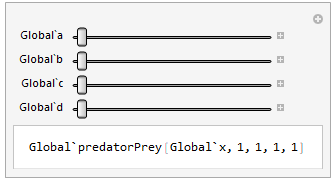

In [2]:
Manipulate[
    predatorPrey[x, a, b, c, d],
    
    (* Ползунки для изменения параметров *)
    {a, 1, 10, 1},
    {b, 1, 10, 1},
    {c, 1, 10, 1},
    {d, 1, 10, 1}
]

*Примечание. Графики с ползунками не хотят нормально отрисовываться в юпитере. В WolframCloud все работает хорошо:*
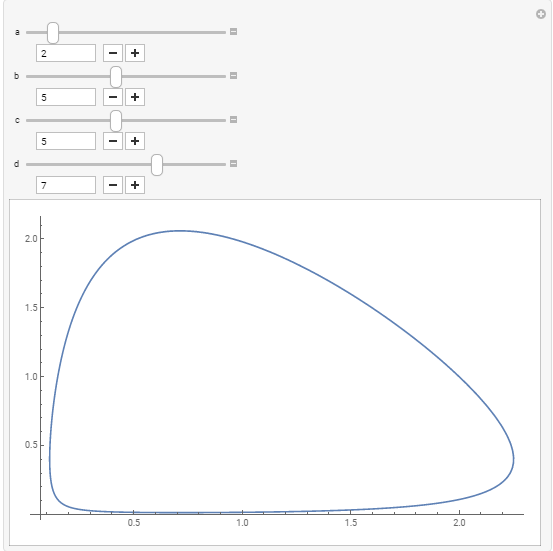